# Credit Card Fraud Detection
## Akbank Makine Öğrenmesine Giriş Bootcamp Projesi

Bu projede, kredi kartı işlemlerinden dolandırıcılık (fraud) olup olmadığını tahmin etmek için gözetimli makine öğrenmesi teknikleri uygulanacaktır.

Makine öğrenmesi ile birlikte aşağıdaki adımlar uygulanacaktır:

- Veri Keşfi (Exploratory Data Analysis - EDA)
- Veri Ön İşleme
- Modelleme ve Hiperparametre Ayarı
- Model Performans Değerlendirme
- Sonuçların Yorumlanması

### Kullanılan Veri Seti:
[Credit Card Fraud Detection – Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

Veri seti, 284.807 işlem ve 30 değişken içermektedir. `Class` sütunu hedef değişkendir (1: fraud, 0: normal).


## 📚 Kütüphanelerin Yüklenmesi

- pandas/numpy: Veri işleme ve sayısal hesaplamalar için.

- matplotlib/seaborn: Veri görselleştirme için.

- train_test_split: Veriyi eğitim ve test setlerine ayırmak için.

- StandardScaler: Sayısal özellikleri ölçeklendirmek için.

- SMOTE: Dengesiz veri setini dengelemek için.

- RandomForestClassifier: Sınıflandırma modeli olarak.

- classification_report/confusion_matrix: Model performansını değerlendirmek için.

- GridSearchCV: Hiperparametre optimizasyonu için.

- warnings: Gereksiz uyarıları gizlemek için.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## 🧾 Veri Seti İncelemesi

Veri kümesinde toplam **284,807 işlem** yer almaktadır ve her işlem **31 sütun** içerir.

### 🔹 Özellikler (Features):

- **Time**: İşlemin ilk işlemden itibaren geçen zamanı (saniye cinsinden). Bu sütun veri sırasını gösterir.
- **V1 - V28**: Finansal bilgilerin gizliliğini korumak adına PCA (Principal Component Analysis) dönüşümü ile oluşturulmuş anonimleştirilmiş sütunlardır.
- **Amount**: İşlem tutarı. Bu özellik ölçeklendirilmeden (raw) verilmiştir ve modelden önce işlenmelidir.
- **Class**: Hedef değişkenimiz.  
  - `0`: Normal işlem  
  - `1`: Sahtekarlık (fraud) işlemi

Veri seti ciddi bir sınıf dengesizliği içerir. Bu durum modellerin performansını doğrudan etkileyebileceği için özel stratejiler (örneğin: SMOTE) uygulanacaktır.

In [14]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [15]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,...,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21878.000000,21877.000000,21877.000000
mean,16924.271551,-0.241060,0.222124,0.737915,0.262153,-0.175227,0.087496,-0.141011,0.019339,0.562079,...,-0.043038,-0.140156,-0.037826,0.010707,0.125683,0.029305,0.011978,0.006293,71.725300,0.003931
std,11005.409549,1.880901,1.518111,1.740947,1.451072,1.414872,1.322606,1.323924,1.383927,1.277273,...,0.849611,0.644914,0.512947,0.590807,0.436855,0.524399,0.395178,0.247253,205.034501,0.062576
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-3.612114,0.000000,0.000000
25%,5496.250000,-0.960913,-0.350012,0.298029,-0.649075,-0.756733,-0.660688,-0.597972,-0.169171,-0.273362,...,-0.257010,-0.564567,-0.175530,-0.331558,-0.136296,-0.339574,-0.067305,-0.010143,5.990000,0.000000
50%,18770.500000,-0.299205,0.206484,0.888730,0.222271,-0.210143,-0.176618,-0.069763,0.026032,0.515162,...,-0.109913,-0.111903,-0.048576,0.062115,0.163900,-0.042054,0.005402,0.019665,17.430000,0.000000
75%,27778.750000,1.164867,0.858497,1.520365,1.132694,0.332839,0.481047,0.447633,0.281472,1.330385,...,0.059938,0.267688,0.074156,0.399318,0.404503,0.320185,0.095819,0.077587,62.390000,0.000000
max,31907.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7879.420000,1.000000


##🔍 Eksik Değer Analizi

Veri kümesinde toplam 31 sütun bulunmaktadır. İlk incelemeye göre:

Amount, ve Class sütunlarında 1’er adet eksik değer bulunmaktadır.

Bu küçük miktarda eksik veri, doğrudan silinerek temizlenebilir (dropna).

In [17]:
# Eksik değer sayısı ve yüzdesi
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_table = pd.DataFrame({'Eksik Değer Sayısı': missing, 'Yüzde (%)': missing_percent})
missing_table = missing_table[missing_table['Eksik Değer Sayısı'] > 0]
missing_table.sort_values('Eksik Değer Sayısı', ascending=False, inplace=True)
missing_table

,Eksik Değer Sayısı,Yüzde (%)
Amount,1,0.004571
Class,1,0.004571


In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


## Eğitim ve Test Setine Bölme & Özellik Ölçeklendirme

Eksik değerleri temizledikten sonra, verimizi eğitim ve test olarak ayırıyoruz.  
Ayrıca, modelin daha iyi öğrenebilmesi için 'Amount' ve 'Time' sütunlarını standartlaştırıyoruz.

**Standartlaştırma (StandardScaler)**, her özelliğin ortalamasını 0, standart sapmasını 1 olacak şekilde dönüştürür.  
Bu sayede tüm özellikler aynı ölçeğe gelir ve model daha dengeli öğrenir.

1. `X` değişkenleri hedef olan 'Class' dışındaki tüm sütunlardan oluşur.  
2. `y` hedef değişkendir (fraud olup olmama).  
3. Veri, %70 eğitim, %30 test olacak şekilde ve sınıf dağılımı korunarak bölünür.  
4. Eğitim verisindeki 'Amount' ve 'Time' sütunları `StandardScaler` ile ölçeklendirilir.  
5. Test verisi ise aynı scaler kullanılarak dönüştürülür (fit edilmez).
> Test verisine `fit` işlemi uygulanmaz çünkü bu veriler, modelin hiç görmemesi gereken "gerçek dünya" verisi gibi değerlendirilmelidir. Bu nedenle test verisi, yalnızca eğitim verisinden öğrenilen scaler ile `transform` edilerek dönüştürülür. Aksi takdirde veri sızıntısı (data leakage) meydana gelir ve modelin değerlendirmesi yanıltıcı olur.




In [20]:
# Özellikler (X) ve hedef değişken (y) ayrımı
X = df.drop('Class', axis=1)
y = df['Class']

# Eğitim ve test setine bölme (stratify ile sınıf dağılımı korunur)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# StandardScaler nesnesi oluşturma
scaler = StandardScaler()

# Eğitim setindeki 'Amount' ve 'Time' sütunlarını fit_transform ile ölçeklendirme
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])

# Test setindeki 'Amount' ve 'Time' sütunlarını sadece transform ile ölçeklendirme
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

## Sınıf Dağılımının İncelenmesi

Veri setimizde sahtekarlık (fraud) ve normal işlemlerin sayısını inceleyelim.

- **Class 0**: Normal işlemler, toplam **21791** kayıt  
- **Class 1**: Sahtekarlık yapılan işlemler, toplam **86** kayıt

Bu sonuç, veri setinin oldukça dengesiz olduğunu gösteriyor. Sahtekarlık (fraud) örnekleri, toplam işlemlerin çok küçük bir kısmını oluşturuyor.

Aşağıdaki grafik, sınıf dağılımını görsel olarak göstermektedir:

Class
0.0    21791
1.0       86
Name: count, dtype: int64
None


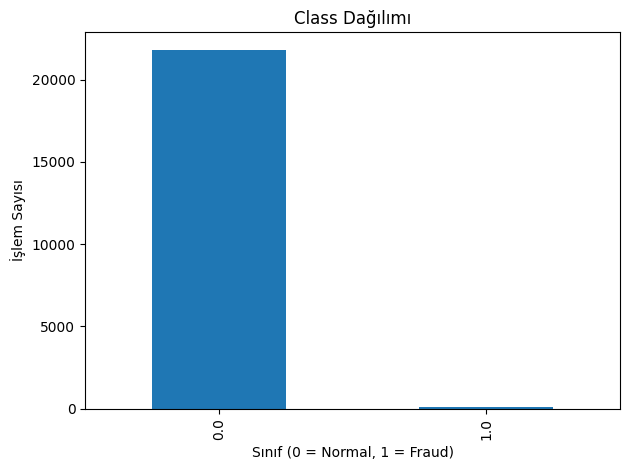

In [21]:
# Sınıf dağılımı grafiği
df['Class'].value_counts().plot(kind='bar', title='Class Dağılımı')
plt.xlabel('Sınıf (0 = Normal, 1 = Fraud)')
plt.ylabel('İşlem Sayısı')
print(df['Class'].value_counts())
print(plt.tight_layout())

### 🔄 Sınıf Dengesizliği ile Başa Çıkma: SMOTE

Veri setindeki dolandırıcılık (fraud) örnekleri, normal işlemlere kıyasla oldukça azdır. Bu ciddi sınıf dengesizliği, modelin azınlık sınıfı öğrenmesini zorlaştırabilir.

Bu problemi çözmek için **SMOTE (Synthetic Minority Over-sampling Technique)** yöntemi kullanılmıştır. SMOTE, azınlık sınıfındaki örneklerden sentetik (yapay) yeni örnekler üreterek eğitim verisinde sınıflar arasındaki dengeyi sağlar.

⚠️ SMOTE yalnızca **eğitim setine** uygulanmıştır. Test seti ise olduğu gibi bırakılmıştır. Böylece model, dengeli verilerle öğrenirken gerçek dünyadaki dengesiz verilerle test edilerek **objektif bir performans değerlendirmesi** yapılabilir.


In [22]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("SMOTE sonrası eğitim seti sınıf dağılımı:")
print(pd.Series(y_train_res).value_counts())

print("\nTest seti sınıf dağılımı:")
print(pd.Series(y_test).value_counts())

SMOTE sonrası eğitim seti sınıf dağılımı:
Class
0.0    15253
1.0    15253
Name: count, dtype: int64

Test seti sınıf dağılımı:
Class
0.0    6538
1.0      26
Name: count, dtype: int64


## 🔍 Farklı Makine Öğrenmesi Modellerinin Karşılaştırılması

Bu projede, kredi kartı dolandırıcılığı gibi dengesiz sınıf problemlerine uygun çeşitli gözetimli öğrenme algoritmaları karşılaştırılmıştır:

- **Logistic Regression**: Temel ve hızlı bir modeldir. Özellikle yorumlanabilirliği yüksek olması ve düşük hesaplama maliyeti nedeniyle başlangıç modeli olarak tercih edilmiştir.

- **Random Forest**: Karar ağaçlarının topluluğundan oluşur. Çok sayıda karar ağacının birleşimi sayesinde daha iyi genelleme yapabilir ve karmaşık veri ilişkilerini öğrenme konusunda oldukça başarılıdır.

- **XGBoost (Extreme Gradient Boosting)**: Boosting yaklaşımıyla ardışık karar ağaçları oluşturarak hata oranını azaltmayı hedefler. İçeriğinde yer alan düzenleme (regularization) mekanizması sayesinde aşırı öğrenmeye karşı dirençlidir ve yüksek doğruluk oranlarıyla öne çıkar.



In [23]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Modelleri oluştur
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Her modeli eğit ve test setinde değerlendir
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    print(f"\n{name} Performans:")
    print(classification_report(y_test, y_pred))



Logistic Regression Performans:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      6538
         1.0       0.20      1.00      0.33        26

    accuracy                           0.98      6564
   macro avg       0.60      0.99      0.66      6564
weighted avg       1.00      0.98      0.99      6564


Random Forest Performans:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6538
         1.0       0.83      0.96      0.89        26

    accuracy                           1.00      6564
   macro avg       0.92      0.98      0.95      6564
weighted avg       1.00      1.00      1.00      6564


XGBoost Performans:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6538
         1.0       0.78      0.96      0.86        26

    accuracy                           1.00      6564
   macro avg       0.89      0.98      0.93    

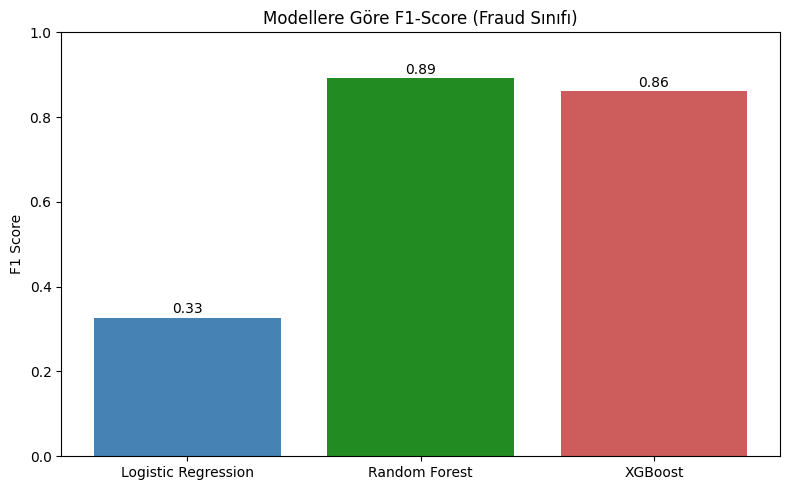

In [24]:
from sklearn.metrics import f1_score
model_names = []
f1_scores = []

# Aynı modellerle tekrar test seti üzerinden F1 skorları alınıyor
for name, model in models.items():
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    model_names.append(name)
    f1_scores.append(score)

# Görselleştirme
plt.figure(figsize=(8,5))
bars = plt.bar(model_names, f1_scores, color=['steelblue', 'forestgreen', 'indianred'])
plt.ylim(0, 1)
plt.title("Modellere Göre F1-Score (Fraud Sınıfı)")
plt.ylabel("F1 Score")

for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

##🔍 Model Seçimi: Neden Random Forest?
Model karşılaştırmalarında Logistic Regression, Random Forest ve XGBoost değerlendirilmiştir. Random Forest modeli:

- Sınıf 1 (fraud) için en yüksek F1-score'u (0.89) sağlamıştır.

- Precision ve recall dengesi en başarılı model olmuştur.

- Aşırı öğrenme (overfitting) eğilimi düşüktür ve yorumlaması kolaydır.

Bu nedenlerle hiperparametre optimizasyonu Random Forest üzerinde uygulanmış ve bu modelle devam edilmiştir.

In [25]:
best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

best_rf.fit(X_train_res, y_train_res)

# Test seti üzerinde tahmin yap
y_pred = best_rf.predict(X_test)

# Performans değerlendirmesi
report = classification_report(y_test, y_pred, output_dict=True)

accuracy = report['accuracy']

df_report = pd.DataFrame(report).transpose()

df_report.loc['accuracy', 'support'] = None
df_report = df_report.round(4)
print(df_report)



              precision  recall  f1-score  support
0.0              0.9998  0.9992    0.9995   6538.0
1.0              0.8333  0.9615    0.8929     26.0
accuracy         0.9991  0.9991    0.9991      NaN
macro avg        0.9166  0.9804    0.9462   6564.0
weighted avg     0.9992  0.9991    0.9991   6564.0


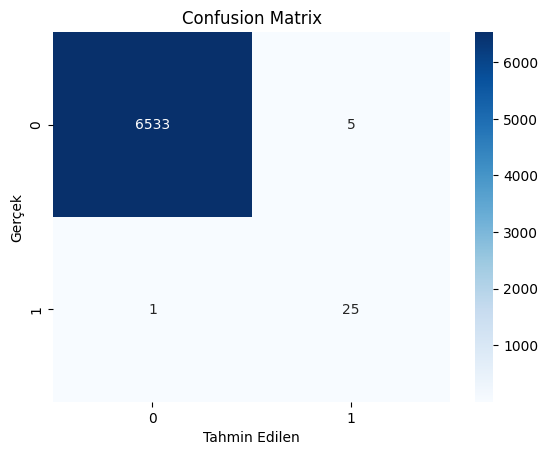

In [26]:
# Confusion matrix çizimi
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()
